**Trabalho Final - Redes Complexas no Comércio Mundial**

Francisco de Freitas Pedrosa - 11215699

**Introdução**

Este trabalho é baseado em *Topology of The World Web* (Serano e Bogunã, 2003), mas outras métricas de redes também foram analisadas. Os dados de comércio entre os países foram extraídos de UN Contrade Database, porém devidos suas limitações de acessos aos dados foi necessário baixar individualmente os dados de cada país em cada ano, por isso foi preciso criar uma lista limitada de países. Quanto ao intervalo de tempo, usamos um período aonde mais de 70% destes países tinha dados disponiveis, isso é de 1992 á 2019. <br>

Todas as bases de dados foram pré-tratadas e carregadas no github para facilitar a consulta.

In [86]:
paises = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bermuda", "Bhutan", "Bolivia (Plurinational State of)", "Bosnia Herzegovina", "Botswana", "Brazil", "Brunei Darussalam", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Rep.", "Chad", "Chile", "China", "China, Hong Kong SAR", "Colombia", "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czechia", "Dem. People's Rep. of Korea", "Dem. Rep. of the Congo", "Denmark", "Djibouti", "Dominica", "Dominican Rep.", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "FS Micronesia", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Lao People's Dem. Rep.", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Isds", "Mauritania", "Mauritius", "Mexico", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Rep. of Korea", "Rep. of Moldova", "Romania", "Russian Federation", "Rwanda",  "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Isds", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", "United Rep. of Tanzania", "Uruguay", "USA", "Uzbekistan", "Vanuatu", "Venezuela", "Viet Nam", "Yemen", "Zambia", "Zimbabwe"]
codigos = ["AFG", "ALB", "DZA", "AND", "AGO", "ATG", "ARG", "ARM", "AUS", "AUT", "AZE", "BHS", "BHR", "BGD", "BRB", "BLR", "BEL", "BLZ", "BEN", "BMU", "BTN", "BOL", "BIH", "BWA", "BRA", "BRN", "BGR", "BFA", "BDI", "CPV", "KHM", "CMR", "CAN", "CAF", "TCD", "CHL", "CHN", "HKG", "COL", "COM", "COG", "CRI", "CIV", "HRV", "CUB", "CYP", "CZE", "PRK", "COD", "DNK", "DJI", "DMA", "DOM", "ECU", "EGY", "SLV", "GNQ", "ERI", "EST", "SWZ", "ETH", "FJI", "FIN", "FRA", "FSM", "GAB", "GMB", "GEO", "DEU", "GHA", "GRC", "GRD", "GTM", "GIN", "GNB", "GUY", "HTI", "HND", "HUN", "ISL", "IND", "IDN", "IRN", "IRQ", "IRL", "ISR", "ITA", "JAM", "JPN", "JOR", "KAZ", "KEN", "KIR", "KWT", "KGZ", "LAO", "LVA", "LBN", "LSO", "LBR", "LBY", "LTU", "LUX", "MDG", "MWI", "MYS", "MDV", "MLI", "MLT", "MHL", "MRT", "MUS", "MEX", "MNG", "MNE", "MAR", "MOZ", "MMR", "NAM", "NRU", "NPL", "NLD", "NZL", "NIC", "NER", "NGA", "MKD", "NOR", "OMN", "PAK", "PLW", "PAN", "PNG", "PRY", "PER", "PHL", "POL", "PRT", "QAT", "KOR", "MDA", "ROU", "RUS", "RWA", "KNA", "LCA", "VCT", "WSM", "SMR", "STP", "SAU", "SEN", "SRB", "SYC", "SLE", "SGP", "SVK", "SVN", "SLB", "SOM", "ZAF", "SSD", "ESP", "LKA", "SDN", "SUR", "SWE", "CHE", "SYR", "TJK", "THA", "TLS", "TGO", "TON", "TTO", "TUN", "TUR", "TKM", "TUV", "UGA", "UKR", "ARE", "GBR", "TZA", "URY", "USA", "UZB", "VUT", "VEN", "VNM", "YEM", "ZMB", "ZWE"]

for i in range(len(paises)):
  print(codigos[i],paises[i])

AFG Afghanistan
ALB Albania
DZA Algeria
AND Andorra
AGO Angola
ATG Antigua and Barbuda
ARG Argentina
ARM Armenia
AUS Australia
AUT Austria
AZE Azerbaijan
BHS Bahamas
BHR Bahrain
BGD Bangladesh
BRB Barbados
BLR Belarus
BEL Belgium
BLZ Belize
BEN Benin
BMU Bermuda
BTN Bhutan
BOL Bolivia (Plurinational State of)
BIH Bosnia Herzegovina
BWA Botswana
BRA Brazil
BRN Brunei Darussalam
BGR Bulgaria
BFA Burkina Faso
BDI Burundi
CPV Cabo Verde
KHM Cambodia
CMR Cameroon
CAN Canada
CAF Central African Rep.
TCD Chad
CHL Chile
CHN China
HKG China, Hong Kong SAR
COL Colombia
COM Comoros
COG Congo
CRI Costa Rica
CIV Cote d'Ivoire
HRV Croatia
CUB Cuba
CYP Cyprus
CZE Czechia
PRK Dem. People's Rep. of Korea
COD Dem. Rep. of the Congo
DNK Denmark
DJI Djibouti
DMA Dominica
DOM Dominican Rep.
ECU Ecuador
EGY Egypt
SLV El Salvador
GNQ Equatorial Guinea
ERI Eritrea
EST Estonia
SWZ Eswatini
ETH Ethiopia
FJI Fiji
FIN Finland
FRA France
FSM FS Micronesia
GAB Gabon
GMB Gambia
GEO Georgia
DEU Germany
GHA Ghana
GRC 

**Montagem das Redes**
Nesta seção montamos duas redes por ano, uma com as importações outra com as exportações. Cada nó representa um país e as arestas represtam que os dois paises são parceiros coméricais importantes, isto é, um deles é responsável por mais de 5% da importações ou exportações do outro.


In [84]:
import networkx as nx
import urllib.request as url
import pandas

exportacoes = []
importacoes = []

for i in range(1992,2020):
  exportacoes.append(nx.Graph())
  importacoes.append(nx.Graph())

pd = pandas.read_csv('https://raw.githubusercontent.com/FranPedrosa/ComercioMundial/master/all_exports.csv')
for index, linha in pd.iterrows():
  ano = linha['year']
  if linha['percentage'] > 0.05:
    exportacoes[ano - 1992].add_edge(linha['reporter'],linha['partner'])

pd = pandas.read_csv('https://raw.githubusercontent.com/FranPedrosa/ComercioMundial/master/all_imports.csv')
for index, linha in pd.iterrows():
  ano = linha['year']
  if linha['percentage'] > 0.05:
    importacoes[ano - 1992].add_edge(linha['reporter'],linha['partner'])





Aqui foi deixada um oportunidade de visualização das redes. Mude as variáveis ano e exportacao para ver outros grafos.

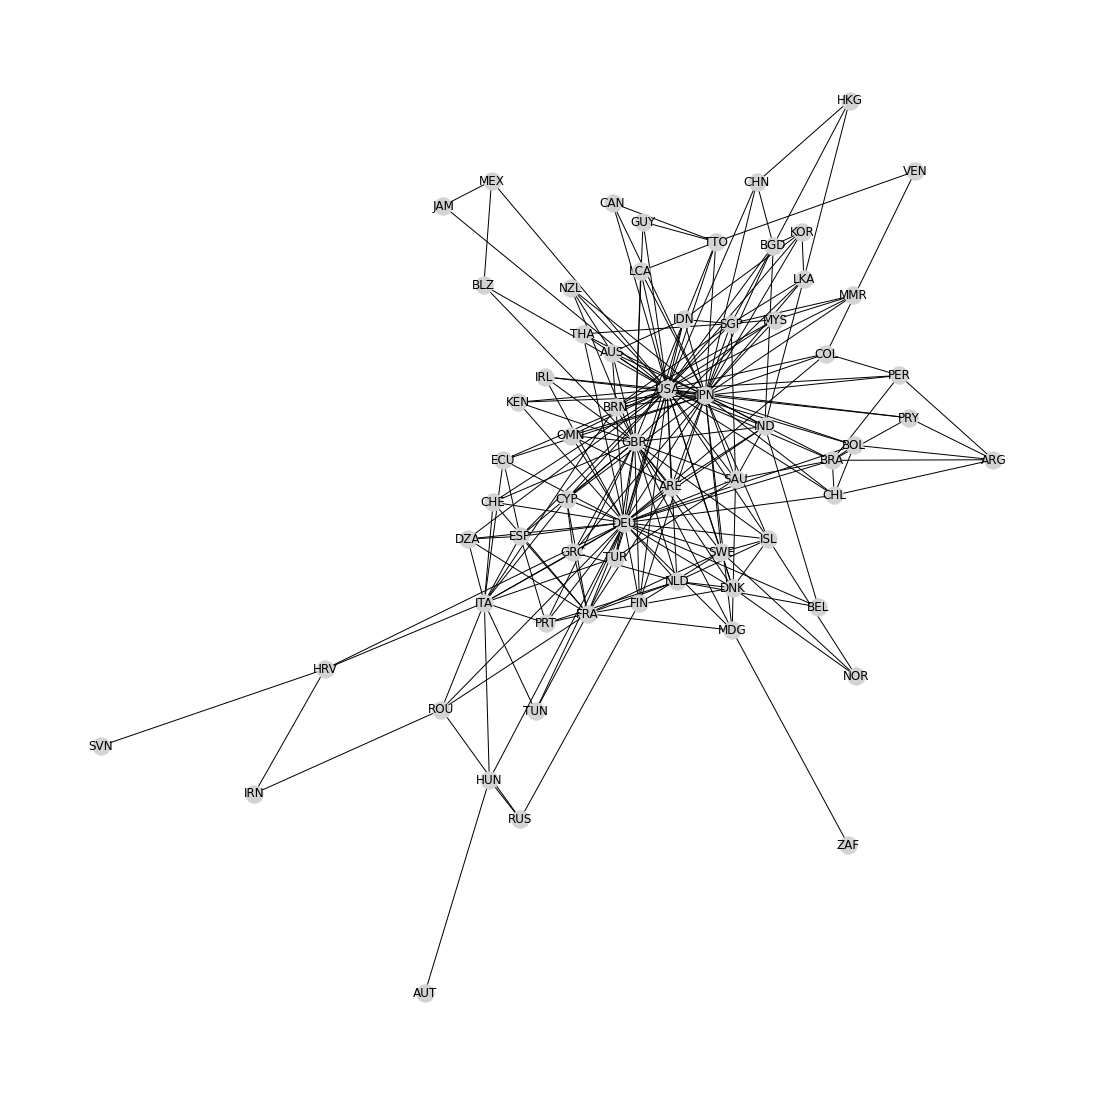

In [82]:
ano = 1992
ex = False

import matplotlib.pyplot as plt

G = exportacoes[ano - 1992] if ex else importacoes[ano - 1992]

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", with_labels=True)
plt.show()



Agora sera analisada algumas métrica da rede e como elas mudaram com o passar dos anos.

Tamanho da Rede:


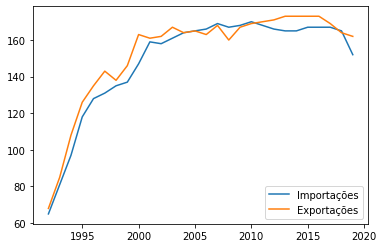

In [58]:
print("Tamanho da Rede:")
imps = []
exps = []
for ano in range(2020-1992):
  imps.append(importacoes[ano].number_of_nodes())
  exps.append(exportacoes[ano].number_of_nodes())
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legends()
plt.show()

Menor Caminho Médio:


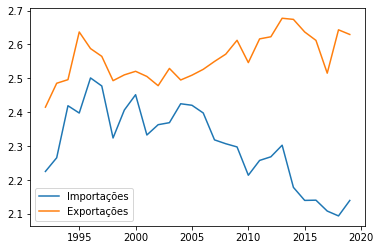

In [60]:
def maior_ilha(G):
  gcc = sorted(nx.connected_components(G), key=len, reverse=True)
  return G.subgraph(gcc[0])

print("Média doMenor Caminho Médio:")
imps = []
exps = []
for ano in range(2020-1992):
  imps.append(nx.average_shortest_path_length(maior_ilha(importacoes[ano])))
  exps.append(nx.average_shortest_path_length(maior_ilha(exportacoes[ano])))
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legend()
plt.show()

Modularidade:


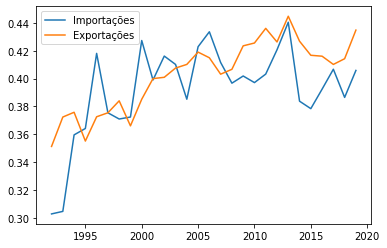

In [64]:
from networkx.algorithms.community import greedy_modularity_communities as gmc
import numpy as np

#Retorna o vetor com a comunidade de cada vetor
def community_array(G,c):
  comms = np.zeros(G.number_of_nodes())
  nc = 0
  for comm in c:
    for i in comm:
      comms[i] = nc
    nc += 1
  return comms

#Função para calcular a modularidade dada a partição, usa multiplicação de matrizes do numpy
def modularity(G,comms):
  N = G.number_of_nodes()
  M = G.number_of_edges()
  degrees = np.array([G.degree(v) for v in G.nodes()])
  probs = np.dot(degrees.reshape(N,1),degrees.reshape(1,N)) / (2*M)
  kronecker = np.array([[ int(comms[i] == comms[j]) for i in range(N)] for j in range(N)])
  adj = nx.adjacency_matrix(G).toarray()
  return np.sum((adj -  probs) * kronecker) / (2*M)

def gmc_modularity(src):
  G = nx.convert_node_labels_to_integers(src, first_label=0)
  comms = community_array(G,gmc(G))
  m1 = modularity(G,comms)
  return m1

print("Modularidade:")
imps = []
exps = []
for ano in range(2020-1992):
  imps.append(gmc_modularity(importacoes[ano]))
  exps.append(gmc_modularity(exportacoes[ano]))
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legend()
plt.show()

Média da Centralidade de Eigenvector:


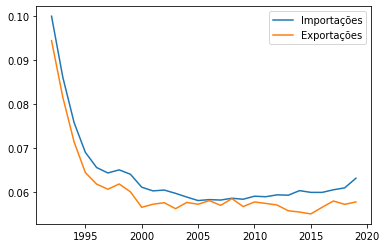

In [69]:
def media_centralidade_eignevector(src):
  EC = list(dict(nx.eigenvector_centrality(src, max_iter = 100)).values())
  return np.mean(EC)

print("Média da Centralidade de Eigenvector:")
imps = []
exps = []
for ano in range(2020-1992):
  imps.append(media_centralidade_eignevector(importacoes[ano]))
  exps.append(media_centralidade_eignevector(exportacoes[ano]))
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legend()
plt.show()

Entropia do Grau:


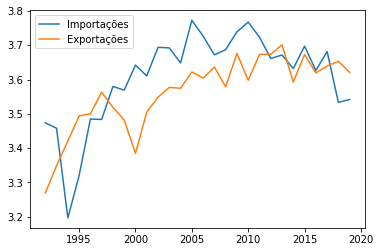

In [71]:
import math

def dist_graus(G):
  graus = {}
  for v in G.nodes():
    g = G.degree(v)
    if not g in graus.keys():
      graus[g] = 0
    graus[g] += 1
  return graus

def shanon(graus):
  entropia = 0
  soma = sum(graus.values())
  for k in graus.values():
    dk = k/soma
    entropia -= dk * math.log(dk,2)
  return entropia



print("Entropia do Grau:")
imps = []
exps = []
for ano in range(2020-1992):
  imps.append(shanon(dist_graus(importacoes[ano])))
  exps.append(shanon(dist_graus(exportacoes[ano])))
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legend()
plt.show()

Porcentagem de nós vizinhos do maior grau:


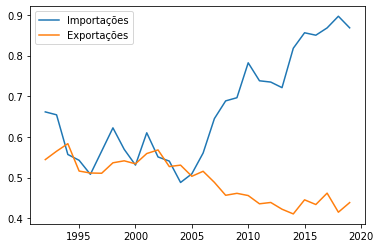

In [78]:
def maior_grau_pct(G):
  graus = sorted(list(dict(nx.degree(G)).values()))
  return graus[-1]/G.number_of_nodes()

print("Porcentagem de nós vizinhos do maior grau:")
imps = []
exps = []
for ano in range(2020-1992):
  imps.append(maior_grau_pct(importacoes[ano]))
  exps.append(maior_grau_pct(exportacoes[ano]))
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legend()
plt.show()


Neste último gráfico podemos ver que uma concentração gigante de vizinhos no grau com mais vizinhos a partir de 2005 nas importações, com esse nó chegando ser um parceiro significativo de importações de quase 90% dos países.
Basenado-se nisso foi explorado quais países eram os que tinham maior quantidade de vizinhos. 

In [105]:
print("Principais Parceiros de Importação:")
for a in range(2020-1992):
  ano = 1992+a
  graus = [ -el[1] for el in nx.degree(importacoes[a])]
  cods = [ el[0] for el in nx.degree(importacoes[a])]
  top3 = np.argsort(graus)[0:3]
  print(ano,end='  ')
  for i in range(3):
    print(cods[top3[i]],':',-graus[top3[i]],end='    ')
  print()


Principais Parceiros de Importação:
1992  USA : 43    DEU : 37    JPN : 36    
1993  USA : 53    JPN : 44    DEU : 43    
1994  USA : 54    DEU : 46    GBR : 37    
1995  USA : 64    DEU : 60    GBR : 44    
1996  USA : 65    DEU : 61    GBR : 39    
1997  USA : 74    DEU : 52    GBR : 44    
1998  USA : 84    DEU : 63    JPN : 52    
1999  USA : 78    DEU : 56    FRA : 48    
2000  USA : 78    DEU : 56    JPN : 45    
2001  USA : 97    DEU : 68    FRA : 48    
2002  USA : 87    DEU : 72    FRA : 48    
2003  USA : 87    DEU : 67    CHN : 55    
2004  USA : 80    CHN : 65    DEU : 64    
2005  USA : 84    CHN : 78    DEU : 61    
2006  CHN : 93    USA : 80    DEU : 63    
2007  CHN : 109    USA : 82    DEU : 64    
2008  CHN : 115    USA : 82    DEU : 62    
2009  CHN : 117    USA : 83    DEU : 58    
2010  CHN : 133    USA : 82    DEU : 60    
2011  CHN : 124    USA : 79    DEU : 56    
2012  CHN : 122    USA : 78    DEU : 52    
2013  CHN : 119    USA : 73    DEU : 54    
2014  CHN :

In [104]:
print("Principais Parceiros de Exportação:")
for a in range(2020-1992):
  ano = 1992+a
  graus = [ -el[1] for el in nx.degree(exportacoes[a])]
  cods = [ el[0] for el in nx.degree(exportacoes[a])]
  top3 = np.argsort(graus)[0:3]
  print(ano,end='  ')
  for i in range(3):
    print(cods[top3[i]],':',-graus[top3[i]],end='    ')
  print()

Principais Importadores:
1992  USA : 37    DEU : 30    GBR : 26    
1993  USA : 48    DEU : 35    GBR : 32    
1994  USA : 63    DEU : 51    GBR : 38    
1995  USA : 65    DEU : 58    GBR : 43    
1996  USA : 69    DEU : 53    GBR : 43    
1997  USA : 73    DEU : 50    GBR : 44    
1998  USA : 74    DEU : 54    GBR : 48    
1999  USA : 79    DEU : 54    GBR : 53    
2000  USA : 87    GBR : 59    DEU : 55    
2001  USA : 90    GBR : 58    DEU : 51    
2002  USA : 92    GBR : 56    DEU : 52    
2003  USA : 88    GBR : 59    DEU : 54    
2004  USA : 87    GBR : 53    DEU : 52    
2005  USA : 83    GBR : 54    DEU : 52    
2006  USA : 84    DEU : 48    FRA : 46    
2007  USA : 82    DEU : 50    FRA : 47    
2008  USA : 73    DEU : 47    FRA : 45    
2009  USA : 77    DEU : 50    FRA : 47    
2010  USA : 77    DEU : 48    CHN : 45    
2011  USA : 74    DEU : 49    CHN : 41    
2012  USA : 75    DEU : 47    CHN : 45    
2013  USA : 73    DEU : 46    CHN : 44    
2014  USA : 71    CHN : 50   

Podemos ver que esse crescimento do nó mais conectado, foi guiado por um crescimento expresivo da China, abaixo segue um grafico comparando o *between centrality* da China e dos EUA.

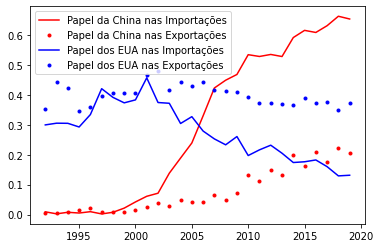

In [113]:
chn_imps = []
chn_exps = []
usa_imps = []
usa_exps = []
for ano in range(2020-1992):
  bc_imp = nx.betweenness_centrality(importacoes[ano])
  bc_exp = nx.betweenness_centrality(exportacoes[ano])
  chn_imps.append(bc_imp['CHN'])
  chn_exps.append(bc_exp['CHN'])
  usa_imps.append(bc_imp['USA'])
  usa_exps.append(bc_exp['USA'])
plt.plot(range(1992,2020),chn_imps,'r-',label='Papel da China nas Importações')
plt.plot(range(1992,2020),chn_exps,'r.',label='Papel da China nas Exportações')
plt.plot(range(1992,2020),usa_imps,'b-',label='Papel dos EUA nas Importações')
plt.plot(range(1992,2020),usa_exps,'b.',label='Papel dos EUA nas Exportações')
plt.legend()
plt.show()

Um aspecto interessante de ser analisar no gráfico é qual importânicia da proximidade territorial entre países para suas relações de comércio, usando um base de dados com as coordenadas de cada país, podemos calcular a distância média das arestas do gráfico.

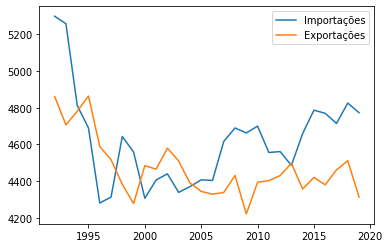

In [131]:
def dist_coord(lat1,lon1,lat2,lon2):
  phi1 = math.radians(lat1)
  phi2 = math.radians(lat2)  
  delta_phi = math.radians(lat2 - lat1)
  delta_lambda = math.radians(lon2 - lon1)
  a = math.sin(delta_phi / 2)**2 + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2)**2
  c = 2*math.atan2(math.sqrt(a),math.sqrt(1 - a))
  return 6371*c

positions = pandas.read_csv('https://raw.githubusercontent.com/FranPedrosa/ComercioMundial/master/pos.csv')
pos = {}

for row in positions.iterrows():
  linha = row[1]
  pos[linha['codigo']] = (linha['latitude'],linha['longitude'])

imps = []
exps = []
for ano in range(2020-1992):
  soma = 0
  for a,b in importacoes[ano].edges:
    lat1,lon1 = pos[a]
    lat2,lon2 = pos[b] 
    soma += dist_coord(lat1,lon1,lat2,lon2)
  imps.append(soma/importacoes[ano].number_of_edges())
  soma = 0
  for a,b in exportacoes[ano].edges():
    lat1,lon1 = pos[a]
    lat2,lon2 = pos[b] 
    soma += dist_coord(lat1,lon1,lat2,lon2)
  exps.append(soma/exportacoes[ano].number_of_edges())
plt.plot(range(1992,2020),imps,label='Importações')
plt.plot(range(1992,2020),exps,label='Exportações')
plt.legend()
plt.show()

**Conclusões:**
O Principal fenômeno observado na análise dos gráficos foi a ascenção da China no comérico mundial.  É possível que as observações tenham sido limitadas pelo recorte dos anos analisados ou pela definição de parceiro considerada.

**Referências:** <br>

Serrano, M. Á., & Boguñá, M. (2003). Topology of the world trade web. Physical Review E, 68(1). doi:10.1103/physreve.68.015101 <br> 
Dados de Comércio Mundial: https://comtrade.un.org/ <br>
Dados de Posição Geográfica: https://github.com/google/dspl/blob/master/samples/google/canonical/countries.csv <br>


